In [1]:
import os

In [4]:
os.getcwd()

'C:\\Users\\kaust\\OneDrive\\Desktop\\Supply Chain Analytics'

In [3]:
os.chdir("C:\\Users\\kaust\\OneDrive\\Desktop\\Supply Chain Analytics")

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
retail_clean = pd.read_csv('retail_clean.csv')

In [119]:
retail_clean

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France,12.60
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France,16.60
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France,16.60
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680,France,14.85


In [120]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  int64  
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 59.5+ MB


In [121]:
# For making date workable
retail_clean.InvoiceDate
retail_clean['InvoiceDate']= pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date']= retail_clean['InvoiceDate'].dt.strftime('%d-%m-%y')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [122]:
## Creating month, year and week columns 
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['week'] = retail_clean.date.dt.week

C:\Users\kaust\AppData\Local\Temp\ipykernel_23032\4206364005.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  retail_clean['week'] = retail_clean.date.dt.week


In [123]:
## summary statistics for months
retail_clean.columns
retail_clean.month.describe()

count    779495.000000
mean          7.417110
std           3.422346
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

In [124]:
ts = retail_clean.groupby(['week','month', 'year']).agg(date = ('date','first'),
                                               total_revenue = ('Revenue', np.sum)).reset_index().sort_values('date')


In [125]:
ts

,week,month,year,date,total_revenue
113,49,12,2009,2009-12-01,232177.51
116,50,12,2009,2009-12-07,207908.73
118,51,12,2009,2009-12-14,207685.87
120,52,12,2009,2009-12-21,35731.90
0,1,1,2010,2010-01-04,167636.95
...,...,...,...,...,...
106,46,11,2011,2011-11-14,276216.98
108,47,11,2011,2011-11-21,248234.58
110,48,11,2011,2011-11-28,141669.57
112,48,12,2011,2011-12-01,109163.47


In [126]:
ts.to_csv("forecasting_assignment.csv")

In [127]:
## Forecasting using timeseries
## Preparing data
from sklearn.linear_model import LinearRegression
ts['trend'] = range(ts.shape[0])
ts['month'] = ts['month'].astype('category')

##dropping column
X = ts.drop(['week','year','date','total_revenue'], axis=1)

names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
y = ts.total_revenue.values

In [128]:
## Creating Linear Regression model

model = LinearRegression()

model.fit(X,y)



LinearRegression()

In [129]:
model.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [130]:
model.coef_

array([-7.50587618e+00, -1.85162279e+04, -3.77331573e+04, -1.42433897e+04,
       -3.72762502e+04, -2.73256065e+04, -1.35913538e+04, -2.43256353e+04,
       -2.98789922e+04,  3.48536846e+04,  4.50119036e+04,  8.92286442e+04,
        3.37963804e+04])

In [131]:
dict1= list(zip(names,model.coef_))


prediction= model.predict(X)

ts['prediction']= prediction




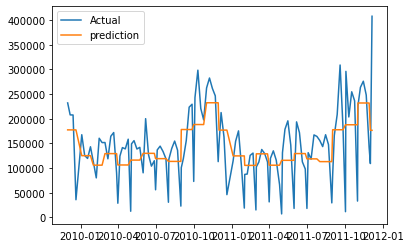

In [132]:
plt.plot(ts.date,ts.total_revenue,label='Actual')
plt.plot(ts.date,ts.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()

In [133]:
max_date = ts.date.max()
max_date

Timestamp('2011-12-05 00:00:00')

In [142]:
## Forecasting for 32 next weeks
dates = pd.DataFrame({'date':pd.date_range('2011-02-05','2012-12-05', freq= 'W')})
ts = pd.concat([ts,dates],axis=0)






In [143]:
ts['trend'] = range(ts.shape[0])
ts['month'] = ts['date'].dt.month
ts['month'] = ts['month'].astype('category')

In [144]:
ts

,week,month,year,date,total_revenue,trend,prediction
113,49.0,12,2009.0,2009-12-01,232177.51,0,177476.051819
116,50.0,12,2009.0,2009-12-07,207908.73,1,177468.545943
118,51.0,12,2009.0,2009-12-14,207685.87,2,177461.040067
120,52.0,12,2009.0,2009-12-21,35731.90,3,177453.534191
0,1.0,1,2010.0,2010-01-04,167636.95,4,125133.420012
...,...,...,...,...,...,...,...
91,NaN,11,NaN,2012-11-04,NaN,272,NaN
92,NaN,11,NaN,2012-11-11,NaN,273,NaN
93,NaN,11,NaN,2012-11-18,NaN,274,NaN
94,NaN,11,NaN,2012-11-25,NaN,275,NaN


In [151]:
## dropping column
X = ts.drop(['week','year','date','total_revenue','prediction'], axis=1)

names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
y = ts.total_revenue.values

In [152]:
prediction = model.predict(X)

In [153]:
ts['prediction'] = prediction

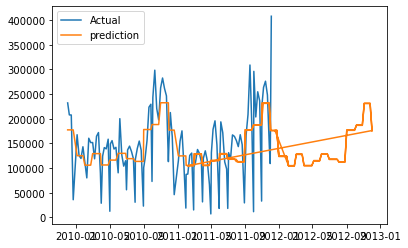

In [154]:
## Visualizing the result
plt.plot(ts.date,ts.total_revenue,label='Actual')
plt.plot(ts.date,ts.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()